In [3]:
import keras
import os
#import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
#from os import walk
#from array import *

import matplotlib.pyplot as plt
#from build_database import build_database

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from PIL import Image, ImageOps

import pickle

In [4]:
descriptors_val = pickle.load(open("save_val.p", "rb"))

In [5]:
descriptors_train = pickle.load(open("save_train.p", "rb"))

In [6]:
imagen = pickle.load(open("save_img.p", "rb"))

In [7]:
imagen3 = pickle.load(open("save_img3.p", "rb"))

In [8]:
x_train = np.reshape(descriptors_train, (1194,4096)) 

In [10]:
x_val = np.reshape(descriptors_val[70], (1,4096)) 

In [11]:
x_train = sklearn.preprocessing.normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)

In [12]:
x_val = sklearn.preprocessing.normalize(x_val, norm='l2', axis=1, copy=True, return_norm=False)

In [13]:
descriptors_traint = x_train.transpose()

In [14]:
similarities=np.matmul(x_val,descriptors_traint)

In [15]:
ranks = np.argsort(similarities, axis=1)[:,::-1]

In [16]:
# get the original images for visualization
x_train_images = []
x_val_images = []

In [17]:
x_val_images.append(np.array(imagen[70]))

In [18]:
b = 0
for b in range(1194): 
    x_train_images.append(np.array(imagen3[b]))

In [19]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*5,w*1))

In [20]:
# Visualize ranks of the 10 queries
offset = 10 # it will show results from query #'offset' to #offset+10
for q in range(1):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(4):
      new_image.paste(Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
      ima_q = Image.fromarray(x_val_images[0])
      ima_q = ImageOps.expand(ima_q, border=20, fill='red')

      new_image.paste(ima_q, (0,w*q))

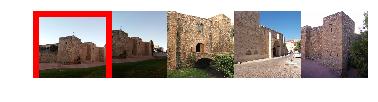

In [21]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [63]:
new_image.save('imagen1.jpg')